In [1]:
import torch
from models.AdaptableViT import AdaptableVisionTransformer
device = torch.device("cuda:3")

patch_size = 4
max_len = 100
embed_dim = 512
num_classes = 10
layers = 6
channels = 3
heads = 16

global_model = AdaptableVisionTransformer(patch_size, max_len, embed_dim, num_classes, layers, channels, heads).to(device)

global_model.num_parameters, global_model.num_adaptable_params

(8102666, 7891968)

In [2]:
import utils
model_fractions = utils.get_model_fractions(global_model)

In [3]:
model_fractions

[0.026003540069404318,
 0.18833628339117026,
 0.3506690267129362,
 0.5130017700347022,
 0.6753345133564681,
 0.837667256678234,
 1.0]

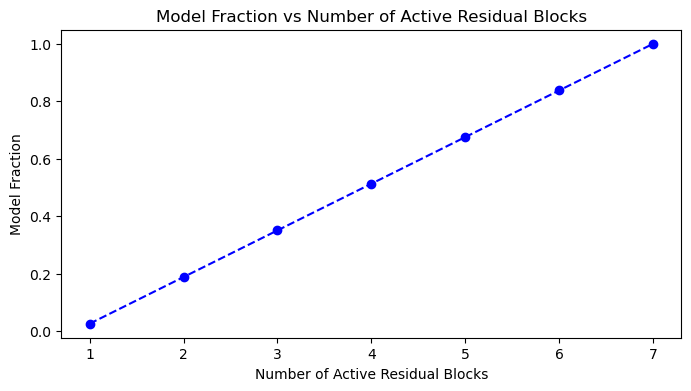

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(np.arange(1,len(model_fractions)+1), model_fractions, '--bo')
plt.ylabel('Model Fraction')
plt.xlabel('Number of Active Residual Blocks')
plt.title("Model Fraction vs Number of Active Residual Blocks")

plt.show()